# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets  # FutureWarning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

import graphviz
import dtreeviz

%matplotlib inline

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
# # FutureWarning:

# boston = datasets.load_boston()
# X = pd.DataFrame(boston.data, columns = boston.feature_names)
# y = pd.DataFrame(boston.target, columns = ['MEDV'])

# # FutureWarning: Function load_boston is deprecated

In [6]:
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
data_url = 'https://raw.githubusercontent.com/BrunoaChagas/ebac/main/boston.csv'
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(data=np.hstack([raw_df.values[::2, :], 
                                  raw_df.values[1::2, :3]]), 
                  columns=columns)

df.to_csv(path_or_buf='boston_clean_data.csv', index=False)

X = df.drop(columns='MEDV')
y = df['MEDV']

print('Quantidade de linhas e colunas de X:', X.shape)
print('Quantidade de linhas de y:', len(y))

df

Quantidade de linhas e colunas de X: (506, 13)
Quantidade de linhas de y: 506


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
y.to_frame()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [9]:
# Verificação das variáveis. 
# Scikit-learn não aceita variáveis string nem missing.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [10]:
df.corr().tail(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


Aparentemente, a variável `RM` (número médio de quartos por habitação) apresenta um interessante potencial preditivo, tendo um valor considerável de correlação com a variável resposta em relação a todas as outras. Outra variável com potencial preditivo interessante é a `LSTAT` (% de status inferior da população), com um valor ainda maior de correlação, porém negativo.

### 3. Separe os dados em validação e teste

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2402)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (379, 13)
X_test: (127, 13)
y_train: (379,)
y_test: (127,)


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [12]:
tree_1 = DecisionTreeRegressor(max_depth=8, random_state=2402)
tree_2 = DecisionTreeRegressor(max_depth=2, random_state=2402)

tree_1.fit(X_train, y_train)
tree_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2402)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [13]:
mse1_train = mean_squared_error(y_true=y_train, y_pred=tree_1.predict(X_train))
mse1_test = mean_squared_error(y_true=y_test, y_pred=tree_1.predict(X_test))

mse2_train = mean_squared_error(y_true=y_train, y_pred=tree_2.predict(X_train))
mse2_test = mean_squared_error(y_true=y_test, y_pred=tree_2.predict(X_test))

template = 'O erro quadrático médio (MSE) da árvore com profunidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(tree_1.get_depth(), 'treino', mse1_train).replace('.', ','))
print(template.format(tree_1.get_depth(), 'teste', mse1_test).replace('.', ','), '\n')

print(template.format(tree_2.get_depth(), 'treino', mse2_train).replace('.', ','))
print(template.format(tree_2.get_depth(), 'teste', mse2_test).replace('.', ','))

O erro quadrático médio (MSE) da árvore com profunidade = 8 para a base de treino é: 1,84
O erro quadrático médio (MSE) da árvore com profunidade = 8 para a base de teste é: 12,65 

O erro quadrático médio (MSE) da árvore com profunidade = 2 para a base de treino é: 27,11
O erro quadrático médio (MSE) da árvore com profunidade = 2 para a base de teste é: 21,70


In [14]:
r2_1_train = tree_1.score(X=X_train, y=y_train)
r2_2_train = tree_2.score(X=X_train, y=y_train)

r2_1_test = tree_1.score(X=X_test, y=y_test)
r2_2_test = tree_2.score(X=X_test, y=y_test)

template = 'O coeficiente de determinação (R-quadrado) da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(tree_1.get_depth(), 'treino', r2_1_train).replace(".", ","))
print(template.format(tree_1.get_depth(), 'teste', r2_1_test).replace(".", ","), '\n')

print(template.format(tree_2.get_depth(), 'treino', r2_2_train).replace(".", ","))
print(template.format(tree_2.get_depth(), 'teste', r2_2_test).replace(".", ","))

O coeficiente de determinação (R-quadrado) da árvore com profundidade = 8 para a base de treino é: 0,98
O coeficiente de determinação (R-quadrado) da árvore com profundidade = 8 para a base de teste é: 0,85 

O coeficiente de determinação (R-quadrado) da árvore com profundidade = 2 para a base de treino é: 0,68
O coeficiente de determinação (R-quadrado) da árvore com profundidade = 2 para a base de teste é: 0,74


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [15]:
print(f'A árvore que parece mais adequada é `tree_1` com profundidade = {tree_1.get_depth()}')

tree_1

A árvore que parece mais adequada é `tree_1` com profundidade = 8


DecisionTreeRegressor(max_depth=8, random_state=2402)

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

1. Visualizar a forma gráfica da árvore com plot_tree

In [16]:
plt.rc('figure', figsize=(18,9))

tp = tree.plot_tree(decision_tree=tree_1, 
                    feature_names=X.columns, 
                    filled=True)

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object') instead.

2. Representação impressa da árvore

In [14]:
text_tree_print = tree.export_text(decision_tree=tree_1)

print(text_tree_print)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_12 <= 10.83
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_12 >  10.83
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_5 <= 6.10
|   |   |   |   |   |--- feature_5 <= 4.41
|   |   |   |   |   |   |--- feature_11 <= 243.06
|   |   |   |   |   |   |   |--- value: [23.10]
|   |   |   |   |   |   |--- feature_11 >  243.06
|   |   |   |   |   |   |   |--- value: [27.50]
|   |   |   |   |   |--- feature_5 >  4.41
|   |   |   |   |   |   |--- feature_6 <= 98.65
|   |   |   |   |   |   |   |--- feature_8 <= 1.50
|   |   |   |   |   |   |   |   |--- value: [16.13]
|   |   |   |   |   |   |   |--- feature_8 >  1.50
|   |   |   |   |   |   |   |   |--- value: [20.31]
|   |   |   |   |   |   |--- feature_6 >  98.65
|   |   |   |   |   |   |   |--- feature_5 <= 5.91
|   |   |   |   |   |   |   |  

3. Visualizar a árvore com [graphviz & dtreeviz](https://github.com/parrt/dtreeviz)

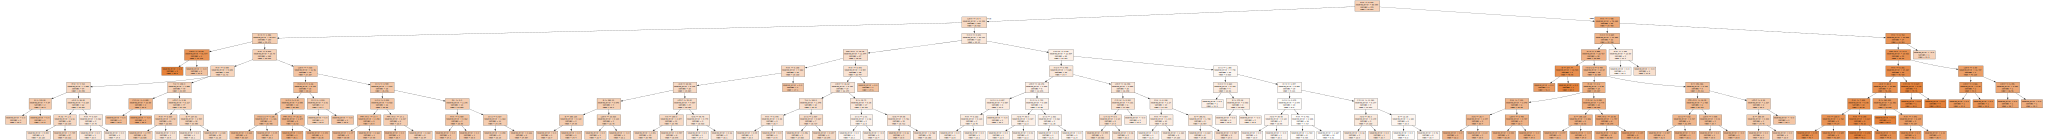

In [15]:
dot_data = tree.export_graphviz(decision_tree=tree_1, 
                                out_file=None, 
                                feature_names=X.columns, 
                                filled=True)

graphviz.Source(dot_data, format='png')

In [16]:
dtreeviz.model(model=tree_1, 
               X_train=X, 
               y_train=y, 
               target_name='target', 
               feature_names=X.columns
              ).view()

/Users/rhatiro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


A variável que parece ser mais importante é a da primeira "quebra" da árvore, `RM`, que representa o número médio de quartos por habitação, possivelmente com o menor Erro Quadrático Médio (EQM) entre todas as variáveis.

---